In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
PATH = 'data/'

In [31]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [32]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv(f'{PATH}kc_house_data.csv', dtype=dtype_dict)
sales = sales.sort_values(['sqft_living','price'])

In [33]:
poly15_data = polynomial_dataframe(sales['sqft_living'],15)
l2_small_penalty = 1.5e-5

In [34]:
from sklearn.linear_model import Ridge

In [35]:
model = Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [36]:
print(model.intercept_,model.coef_) #Ans 1

220664.37505312986 [ 1.24873306e+02 -4.77376011e-02  3.01446238e-05 -2.44419942e-09
 -1.94153675e-13  8.54085686e-18  1.51142121e-21  8.27979094e-26
  6.52603100e-31 -3.27895017e-34 -3.87962315e-38 -2.72437650e-42
 -1.07790800e-46  3.78242694e-51  1.39790296e-54]


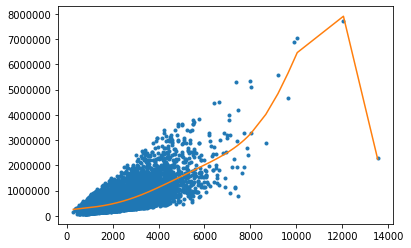

In [37]:
plt.plot(poly15_data['power_1'],sales['price'],'.',
        poly15_data['power_1'],model.predict(poly15_data))

In [14]:
set_1 = pd.read_csv(f'{PATH}wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv(f'{PATH}wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv(f'{PATH}wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv(f'{PATH}wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [15]:
l2_small_penalty = 1e-9

In [16]:
poly15_data_set1 = polynomial_dataframe(set_1['sqft_living'],15)
poly15_data_set2 = polynomial_dataframe(set_2['sqft_living'],15)
poly15_data_set3 = polynomial_dataframe(set_3['sqft_living'],15)
poly15_data_set4 = polynomial_dataframe(set_4['sqft_living'],15)

288998.10746196273 [-1.52107178e+01  4.32261944e-02  7.61301379e-06 -1.01052501e-09
 -3.59830229e-14  2.80067404e-18  3.29599754e-22  1.65500161e-26
  2.77767561e-31 -3.52886683e-35 -4.65374572e-39 -3.49343569e-43
 -1.83615707e-47 -4.56180465e-52  4.50834344e-56]


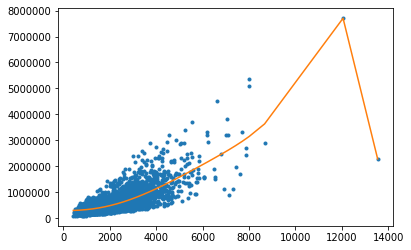

In [38]:
model = Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data_set1, set_1['price'])
print(model.intercept_,model.coef_)
plt.plot(poly15_data_set1['power_1'],set_1['price'],'.',
        poly15_data_set1['power_1'],model.predict(poly15_data_set1))

113497.43719179789 [ 2.88185115e+02 -1.00666670e-01  1.96937395e-05  2.73446796e-09
 -2.15126947e-13 -5.51902015e-17 -3.67567745e-21  8.95563520e-26
  4.70553889e-29  5.94657593e-33  4.57207911e-37  1.55980328e-41
 -1.76760271e-45 -4.15664785e-49 -4.60872794e-53]


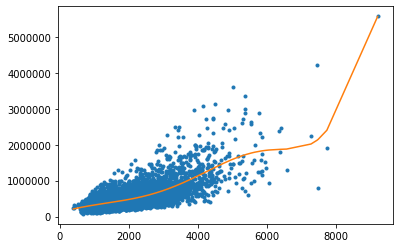

In [39]:
model = Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data_set2, set_2['price'])
print(model.intercept_,model.coef_)
plt.plot(poly15_data_set2['power_1'],set_2['price'],'.',
        poly15_data_set2['power_1'],model.predict(poly15_data_set2))

174149.60431201285 [ 1.87174536e+02 -6.12076951e-02  2.36513260e-05 -1.98609258e-10
 -2.52072849e-13 -1.18384336e-17  9.60893612e-22  1.82218499e-25
  1.27536245e-29  7.23489246e-35 -1.00241945e-37 -1.44889803e-41
 -1.07147764e-45  1.05666483e-50  1.93354431e-53]


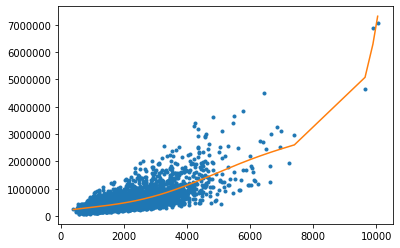

In [40]:
model = Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data_set3, set_3['price'])
print(model.intercept_,model.coef_)
plt.plot(poly15_data_set3['power_1'],set_3['price'],'.',
        poly15_data_set3['power_1'],model.predict(poly15_data_set3))

175579.19735917792 [ 1.29005155e+02  2.49560855e-02 -1.32820212e-05  2.00483868e-09
  6.90941111e-13  1.95152690e-17 -1.27723962e-20 -2.49431825e-24
 -2.10624029e-28  4.70950842e-33  4.62967405e-36  8.42370131e-40
  8.51689677e-44  1.12761947e-49 -2.31981126e-51]


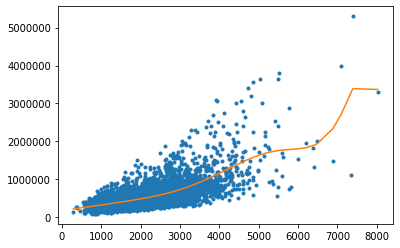

In [41]:
model = Ridge(alpha=l2_small_penalty, normalize=True)
model.fit(poly15_data_set4, set_4['price'])
print(model.intercept_,model.coef_)
plt.plot(poly15_data_set4['power_1'],set_4['price'],'.',
        poly15_data_set4['power_1'],model.predict(poly15_data_set4))

In [42]:
l2_large_penalty=1.23e2

539103.0310577955 [2.32806803e+00 3.53621608e-04 3.31969692e-08 2.00082477e-12
 1.11492559e-16 6.57786122e-21 4.12939525e-25 2.70393755e-29
 1.81614763e-33 1.23824277e-37 8.51872481e-42 5.89455598e-46
 4.09542560e-50 2.85464889e-54 1.99547476e-58]


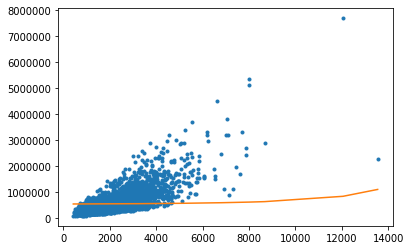

In [43]:
model = Ridge(alpha=l2_large_penalty, normalize=True)
model.fit(poly15_data_set1, set_1['price'])
print(model.intercept_,model.coef_)
plt.plot(poly15_data_set1['power_1'],set_1['price'],'.',
        poly15_data_set1['power_1'],model.predict(poly15_data_set1))

529853.0253577976 [2.09756903e+00 3.90817483e-04 6.67189944e-08 8.90002997e-12
 9.72639877e-16 9.69733682e-20 9.50564475e-24 9.44491031e-28
 9.57191338e-32 9.86945155e-36 1.03101115e-39 1.08729784e-43
 1.15453748e-47 1.23211305e-51 1.31986696e-55]


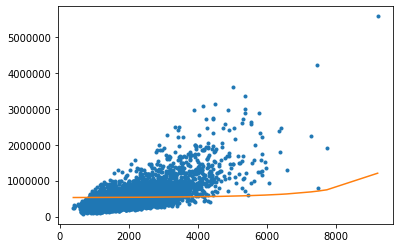

In [45]:
model = Ridge(alpha=l2_large_penalty, normalize=True)
model.fit(poly15_data_set2, set_2['price'])
print(model.intercept_,model.coef_)
plt.plot(poly15_data_set2['power_1'],set_2['price'],'.',
        poly15_data_set2['power_1'],model.predict(poly15_data_set2))

533640.1140974432 [2.28906258e+00 4.12472190e-04 6.08835345e-08 6.58572163e-12
 6.15278155e-16 5.64446634e-20 5.28834396e-24 5.07091402e-28
 4.94657273e-32 4.88043809e-36 4.85009106e-40 4.84161534e-44
 4.84635021e-48 4.85883628e-52 4.87558469e-56]


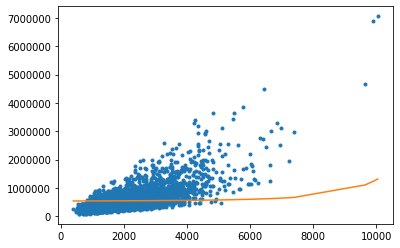

In [46]:
model = Ridge(alpha=l2_large_penalty, normalize=True)
model.fit(poly15_data_set3, set_3['price'])
print(model.intercept_,model.coef_)
plt.plot(poly15_data_set3['power_1'],set_3['price'],'.',
        poly15_data_set3['power_1'],model.predict(poly15_data_set3))

524562.9690466832 [2.08596194e+00 4.05035772e-04 7.46864647e-08 1.13096608e-11
 1.45864442e-15 1.73561251e-19 2.01609632e-23 2.34605255e-27
 2.75636073e-31 3.27043069e-35 3.91046855e-39 4.70118041e-43
 5.67212304e-47 6.85958087e-51 8.30843630e-55]


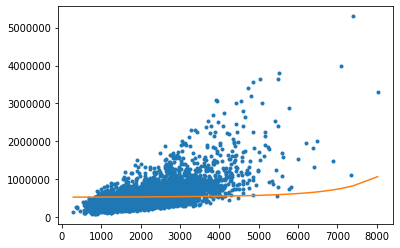

In [47]:
model = Ridge(alpha=l2_large_penalty, normalize=True)
model.fit(poly15_data_set4, set_4['price'])
print(model.intercept_,model.coef_)
plt.plot(poly15_data_set4['power_1'],set_4['price'],'.',
        poly15_data_set4['power_1'],model.predict(poly15_data_set4))

In [49]:
train_valid_shuffled = pd.read_csv(f'{PATH}wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv(f'{PATH}wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [78]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(k):
    start = (n*i)//k
    end = (n*(i+1))//k-1
    print(i, (start, end))
print(n)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)
19396


In [58]:
def rss(x,y): return ((x-y)**2).sum()

In [92]:
poly15_data_shuffled = polynomial_dataframe(train_valid_shuffled['sqft_living'],15)

In [131]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    validation_error = 0
    model = Ridge(alpha=l2_penalty,normalize=True)
    n = len(data)
    for i in range(k):
        start = (n*i)//k
        end = (n*(i+1))//k-1
        train = data[:start].append(data[end+1:])
        valid = data[start:end+1]
        model.fit(train, output[:start].append(output[end+1:]))
        validation_error += rss(model.predict(valid),output[start:end+1])
    return validation_error / k

In [137]:
best_avg_validation_error = None
best_l2_penalty = None
for l2_penalty in np.logspace(3, 9, num=13):
    avg_validation_error = k_fold_cross_validation(10, l2_penalty, poly15_data_shuffled,train_valid_shuffled['price'])
    print(avg_validation_error)
    if best_avg_validation_error is None or avg_validation_error < best_avg_validation_error:
        best_avg_validation_error = avg_validation_error
        best_l2_penalty = l2_penalty
print('-----------')
print(best_avg_validation_error,best_l2_penalty)

264977361036975.94
265692935858318.25
265924368957215.66
265998081509342.66
266021444553980.5
266028837918724.5
266031176438467.9
266031915996607.4
266032149870752.5
266032223828783.66
266032247216419.84
266032254612245.16
266032256951011.06
-----------
264977361036975.94 1000.0


In [138]:
model.fit(poly15_data_shuffled,train_valid_shuffled['price'])

Ridge(alpha=123.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [145]:
"{:e}".format(rss(model.predict(polynomial_dataframe(test['sqft_living'],15)),test['price']))

'2.782289e+14'